# Long Short Term Memory (LSTM) Networks using PyTorch

## What is LSTM?

Long Short-Term Memory Networks (LSTMs) are used for sequential data analysis. LSTM offers solutions to the challenges of learning long-term dependencies.

## Core Components of LSTM

1. Cells: The memory units of LSTMs.
2. Forget Gate: Decides which information from the previous cell state to discard.
3. Input Gate: Determines which new information from the current input to remember.
4. Output Gate: Controls what information from the current cell state to expose as the output.

With these gates, LSTMs can effectively learn long-term dependencies within sequential data.


## 5 steps to run LSTM

1. Import Libraries and Prepare Data
2. Define the LSTM Model
3. Initialize Model, Loss Function, and Optimizer
4. Train the LSTM Model
5. Evaluate and Plot Predictions

In [2]:
# Import Libraries and Prepare Data

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)
torch.manual_seed(0)

# Generate synthetic sine wave data
t = np.linspace(0, 100, 1000)
data = np.sin(t)

# Function to create sequences
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data)-seq_length):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10
X, y = create_sequences(data, seq_length)

print("X:{}".format(X))
print("y:{}".format(y))

# Convert data to PyTorch tensors
trainX = torch.tensor(X[:, :, None], dtype=torch.float32)
trainY = torch.tensor(y[:, None], dtype=torch.float32)

X:[[ 0.          0.09993302  0.19886554 ...  0.64475345  0.71791378
   0.7838866 ]
 [ 0.09993302  0.19886554  0.29580708 ...  0.71791378  0.7838866
   0.84201141]
 [ 0.19886554  0.29580708  0.3897871  ...  0.7838866   0.84201141
   0.89170627]
 ...
 [-0.98700812 -0.9981236  -0.99924619 ... -0.85805249 -0.80243543
  -0.73878464]
 [-0.9981236  -0.99924619 -0.99036467 ... -0.80243543 -0.73878464
  -0.6677374 ]
 [-0.99924619 -0.99036467 -0.97156794 ... -0.73878464 -0.6677374
  -0.59000499]]
y:[ 8.42011406e-01  8.91706275e-01  9.32473678e-01  9.63905466e-01
  9.85686954e-01  9.97600074e-01  9.99525555e-01  9.91444120e-01
  9.73436677e-01  9.45683512e-01  9.08462478e-01  8.62146222e-01
  8.07198446e-01  7.44169268e-01  6.73689717e-01  5.96465408e-01
  5.13269488e-01  4.24934884e-01  3.32345974e-01  2.36429728e-01
  1.38146426e-01  3.84800478e-02 -6.15715795e-02 -1.61006773e-01
 -2.58830020e-01 -3.54061947e-01 -4.45749125e-01 -5.32973611e-01
 -6.14862143e-01 -6.90594881e-01 -7.59413613e-01 -8

In [3]:
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, h0=None, c0=None):
        # If hidden and cell states are not provided, initialize them as zeros
        if h0 is None or c0 is None:
            h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).to(x.device)
            c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).to(x.device)
        
        # Forward pass through LSTM
        out, (hn, cn) = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # Selecting the last output
        return out, hn, cn

In [4]:
# Initialize model, loss, and optimizer
model = LSTMModel(input_dim=1, hidden_dim=100, layer_dim=1, output_dim=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [5]:
# Training loop
num_epochs = 100
h0, c0 = None, None  # Initialize hidden and cell states

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs, h0, c0 = model(trainX, h0, c0)

    # Compute loss
    loss = criterion(outputs, trainY)
    loss.backward()
    optimizer.step()

    # Detach hidden and cell states to prevent backpropagation through the entire sequence
    h0 = h0.detach()
    c0 = c0.detach()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.2866
Epoch [20/100], Loss: 0.0900
Epoch [30/100], Loss: 0.0379
Epoch [40/100], Loss: 0.0184
Epoch [50/100], Loss: 0.0027
Epoch [60/100], Loss: 0.0004
Epoch [70/100], Loss: 0.0008
Epoch [80/100], Loss: 0.0003
Epoch [90/100], Loss: 0.0001
Epoch [100/100], Loss: 0.0001


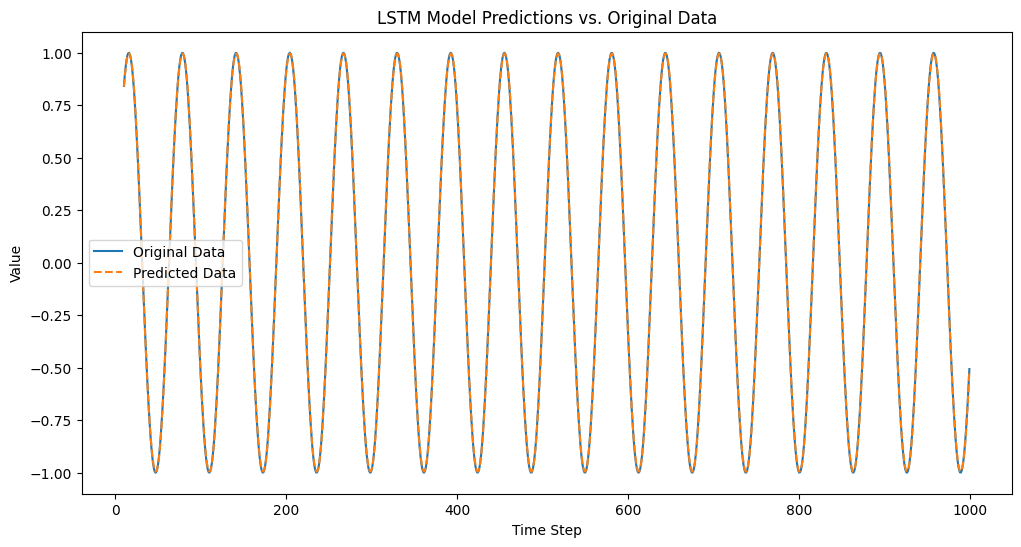

In [6]:
# Predicted outputs
model.eval()
predicted, _, _ = model(trainX, h0, c0)

# Adjusting the original data and prediction for plotting
original = data[seq_length:]  # Original data from the end of the first sequence
time_steps = np.arange(seq_length, len(data))  # Corresponding time steps

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(time_steps, original, label='Original Data')
plt.plot(time_steps, predicted.detach().numpy(), label='Predicted Data', linestyle='--')
plt.title('LSTM Model Predictions vs. Original Data')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.show()